# __Long Short Term Memory Decoder__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

import torch
import matplotlib.pyplot as plt
import seaborn as sns

import scripts.data_loading as dl
import scripts.data_preprocessing as dp
from scripts import model

%matplotlib inline
%load_ext autoreload
%autoreload 2


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.cmap"] = "plasma"

In [2]:
coco_train = dl.CocoCaptions(
    dl.TRAINING_DATASET_PATHS[dl.DatasetType.TRAIN],
    dp.VGGNET_PREPROCESSING_PIPELINE,
    dp.TextPipeline(),
)

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


In [3]:
coco_loader = dl.CocoLoader(coco_train, batch_size=2, num_workers=1)
it = iter(coco_loader)
image_batch, caption_batch = next(it)

In [4]:
encoder = model.VGG19Encoder()
feature_maps, feature_mean = encoder.forward(image_batch)

In [5]:
decoder = model.LSTMDecoder(
    num_embeddings=len(coco_train.target_transform.vocabulary),
    embedding_dim=8,
    encoder_dim=feature_mean.shape[-1],
    decoder_dim=16,
    attention_dim=4
)

In [6]:
embeddings = decoder.word_embedding(caption_batch)

In [7]:
print(f"One-hot encoded caption shape = {caption_batch[0].shape}")
print(f"Embedding shape = {embeddings[0].shape}")

One-hot encoded caption shape = torch.Size([51])
Embedding shape = torch.Size([51, 8])


In [8]:
print(caption_batch[0])
print(embeddings[0])

tensor([10000,    12,    78,    22,    34,   850,    31,     4,     0,   182,
            1,  1421,    65,     2,     0,     8,   283,  1486,     0,    34,
          204,     9,  1584,    47,    34,   924,     1,    34,  1118,     5,
          133,   167,    62,    34,  1186,     4,   121,     4,    36,     2,
          244,     6,    12,  1186,     1,   206,     6,   314, 10002,   139,
        10001])
tensor([[ 0.5221, -0.7675,  0.9266, -0.0492, -0.3117, -0.0313,  0.3353,  0.0568],
        [-0.6493,  0.5526, -1.4344,  1.0803,  0.9232, -0.4186,  0.7394, -0.3660],
        [-0.8376, -0.2765,  0.8740, -0.8055,  1.8551,  0.9826, -0.6458, -1.9240],
        [-0.0468,  0.9076,  1.2584,  0.2163, -0.8681, -0.0124,  0.0471, -0.7296],
        [-0.5859,  0.9860,  0.3971,  0.0723,  2.3268,  1.7227, -0.8873,  0.1357],
        [ 0.3810,  0.7348,  0.2706, -1.4041,  0.9664,  1.2334,  0.9047, -0.2004],
        [-2.2442, -0.0585,  0.1682,  0.7190,  1.1744, -0.7905, -0.0098, -0.2093],
        [ 1.1347,  0

In [9]:
h = decoder.init_h(feature_mean)
c = decoder.init_c(feature_mean)

print(f"Initial h shape = {h.shape}")
print(f"Initial c shape = {c.shape}")

Initial h shape = torch.Size([2, 16])
Initial c shape = torch.Size([2, 16])


In [10]:
# Initial h, c of LSTM computed by MLP(feature_maps_mean)
print(h[0])
print(c[0])

tensor([ 0.1958, -0.1023, -0.1026,  0.0727,  0.0229, -0.2896,  0.0085, -0.2012,
         0.0952, -0.1072, -0.2685, -0.1568,  0.1193,  0.1111,  0.1009, -0.2943],
       grad_fn=<SelectBackward>)
tensor([-0.1591, -0.1990,  0.1946, -0.0414, -0.0296,  0.1970,  0.1577, -0.0668,
         0.0444, -0.2196, -0.0485,  0.0452, -0.3159,  0.0835,  0.0704,  0.1547],
       grad_fn=<SelectBackward>)


In [11]:
# How to get word embeddings of words at particular index of a caption in batch
index = 50
embeddings[:, index]

tensor([[-0.2005,  0.0676,  1.1807, -1.7058,  1.3026,  1.2531,  0.8645,  0.9563],
        [-0.2005,  0.0676,  1.1807, -1.7058,  1.3026,  1.2531,  0.8645,  0.9563]],
       grad_fn=<SelectBackward>)

In [12]:
feature_mean

tensor([[0.1412, 0.1195, 0.1757, 0.1956, 0.2014, 0.1619, 0.1296, 0.1212, 0.1625,
         0.2444, 0.2788, 0.3305, 0.3097, 0.3634, 0.2017, 0.1454, 0.0949, 0.0646,
         0.0738, 0.0580, 0.0685, 0.0834, 0.1497, 0.3198, 0.2564, 0.2706, 0.2274,
         0.2668, 0.4305, 0.2778, 0.3106, 0.2719, 0.2167, 0.0923, 0.0908, 0.1187,
         0.3236, 0.6264, 0.3948, 0.4090, 0.3418, 0.3622, 0.3230, 0.1912, 0.2707,
         0.2215, 0.1806, 0.0852, 0.0931, 0.1090, 0.2908, 0.4428, 0.1921, 0.2183,
         0.2172, 0.3397, 0.3572, 0.2309, 0.2297, 0.1774, 0.2011, 0.1361, 0.1507,
         0.1538, 0.2483, 0.2350, 0.1305, 0.1665, 0.2978, 0.4957, 0.3393, 0.1802,
         0.1848, 0.1314, 0.2549, 0.3474, 0.3141, 0.2434, 0.2089, 0.1747, 0.2000,
         0.2210, 0.3853, 0.5794, 0.2008, 0.1367, 0.1783, 0.1296, 0.2880, 0.4784,
         0.5109, 0.4420, 0.3456, 0.3144, 0.3219, 0.3269, 0.3614, 0.5044, 0.2522,
         0.1661, 0.2265, 0.1435, 0.2713, 0.4259, 0.4878, 0.4517, 0.3450, 0.2899,
         0.2741, 0.2950, 0.3

In [13]:
# How to concatenate context and embedding word
torch.cat([embeddings[:, index], feature_mean], dim=1)

tensor([[-0.2005,  0.0676,  1.1807, -1.7058,  1.3026,  1.2531,  0.8645,  0.9563,
          0.1412,  0.1195,  0.1757,  0.1956,  0.2014,  0.1619,  0.1296,  0.1212,
          0.1625,  0.2444,  0.2788,  0.3305,  0.3097,  0.3634,  0.2017,  0.1454,
          0.0949,  0.0646,  0.0738,  0.0580,  0.0685,  0.0834,  0.1497,  0.3198,
          0.2564,  0.2706,  0.2274,  0.2668,  0.4305,  0.2778,  0.3106,  0.2719,
          0.2167,  0.0923,  0.0908,  0.1187,  0.3236,  0.6264,  0.3948,  0.4090,
          0.3418,  0.3622,  0.3230,  0.1912,  0.2707,  0.2215,  0.1806,  0.0852,
          0.0931,  0.1090,  0.2908,  0.4428,  0.1921,  0.2183,  0.2172,  0.3397,
          0.3572,  0.2309,  0.2297,  0.1774,  0.2011,  0.1361,  0.1507,  0.1538,
          0.2483,  0.2350,  0.1305,  0.1665,  0.2978,  0.4957,  0.3393,  0.1802,
          0.1848,  0.1314,  0.2549,  0.3474,  0.3141,  0.2434,  0.2089,  0.1747,
          0.2000,  0.2210,  0.3853,  0.5794,  0.2008,  0.1367,  0.1783,  0.1296,
          0.2880,  0.4784,  

In [14]:
predictions, contexts, attention_scores = decoder.forward(feature_maps, feature_mean, caption_batch)

In [15]:
caption_batch.shape

torch.Size([2, 51])

Number of predicted words == caption_len - 1

In [16]:
print(predictions.shape)

torch.Size([50, 2, 10004])


Random guess prediction probability

In [17]:
predictions[0, 0, :100]

tensor([ 2.2059e-02, -2.4990e-01, -4.4628e-02,  1.6837e-01,  5.5778e-01,
        -3.2881e-01,  1.4877e-01,  2.0787e-01, -4.3167e-01, -2.4963e-02,
         2.7543e-02,  2.2046e-01,  5.5774e-01,  1.0482e-01,  1.5069e-01,
         1.3423e-02,  1.7178e-01, -6.2479e-01,  2.3339e-01,  1.9671e-02,
        -6.0102e-04,  1.4806e-01, -2.9271e-01, -4.6662e-01,  5.2689e-02,
         1.6235e-01,  4.4098e-01, -8.5777e-02,  2.7222e-01, -2.8388e-01,
        -4.1518e-01, -5.0250e-01, -1.5202e-01, -3.1876e-01,  4.6578e-01,
         5.2998e-01, -5.7127e-01, -3.8153e-01,  3.1438e-01, -4.6655e-01,
        -2.4944e-01,  7.8082e-01,  8.5231e-01, -1.3698e-01,  2.1899e-01,
        -1.4524e-01, -2.1247e-01, -9.1167e-02,  3.2603e-01,  2.7603e-01,
         3.6435e-01, -4.4596e-01,  3.5239e-01,  4.1764e-03,  5.2910e-01,
        -1.8933e-01,  3.5494e-02, -6.0439e-01,  1.8130e-01,  9.1517e-02,
        -1.9553e-01,  4.0708e-01, -1.2288e-01,  4.6279e-01, -9.2823e-01,
        -2.7349e-01,  1.9399e-01, -9.5914e-01, -1.0

In [18]:
1 / 10_004

9.996001599360256e-05

In [19]:
contexts.shape

torch.Size([50, 2, 196])

Contexts output

In [20]:
sample_context = contexts[0, 0].detach()
sample_context = sample_context.view(14, 14).numpy()
sample_context

array([[0.07835459, 0.06201267, 0.07693746, 0.0849928 , 0.08870205,
        0.07753207, 0.06629049, 0.06276356, 0.09185829, 0.13839123,
        0.14724453, 0.16406584, 0.15482949, 0.18614456],
       [0.12357948, 0.0856792 , 0.04794984, 0.03284743, 0.03844137,
        0.03036312, 0.03377403, 0.03980268, 0.08710673, 0.19281039,
        0.14369342, 0.14029601, 0.12418118, 0.1448544 ],
       [0.2502259 , 0.15448503, 0.16876717, 0.15615854, 0.13065681,
        0.04839063, 0.04200864, 0.05565049, 0.19105604, 0.37877724,
        0.22105613, 0.21280171, 0.19779392, 0.21508561],
       [0.15948546, 0.08501098, 0.12020555, 0.11890389, 0.1054007 ,
        0.04999993, 0.05322339, 0.06685597, 0.17786428, 0.26363507,
        0.09251866, 0.0920113 , 0.12239014, 0.20939434],
       [0.18955004, 0.11416941, 0.10961479, 0.09418646, 0.12439428,
        0.09396756, 0.10086551, 0.10537203, 0.1631239 , 0.14839442,
        0.07811158, 0.09260311, 0.19906276, 0.32471249],
       [0.21542528, 0.11593676, 0.1

<AxesSubplot:title={'center':'Sample context obtrain from forward pass'}>

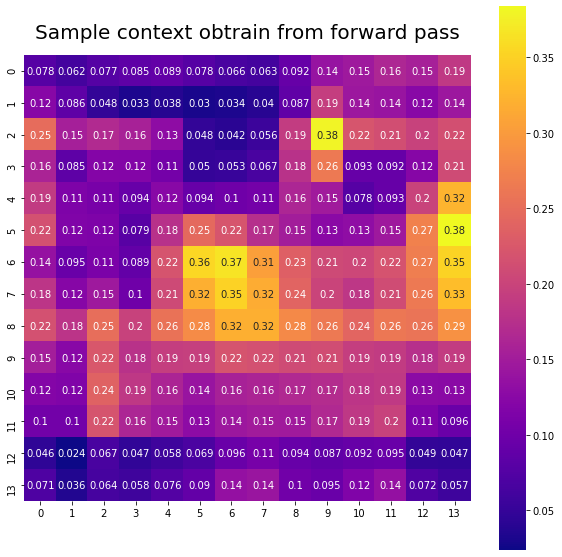

In [22]:
plt.title(f"Sample context obtrain from forward pass", fontsize=20, y=1.025)
sns.heatmap(sample_context, annot=True, square=True, cmap=plt.rcParams["image.cmap"])

Attention_scores

In [23]:
attention_scores.shape

torch.Size([50, 2, 512])

In [24]:
attention_scores[0, 0]

tensor([0.0017, 0.0025, 0.0017, 0.0020, 0.0017, 0.0018, 0.0016, 0.0017, 0.0010,
        0.0018, 0.0018, 0.0016, 0.0019, 0.0018, 0.0020, 0.0018, 0.0010, 0.0019,
        0.0018, 0.0018, 0.0013, 0.0017, 0.0028, 0.0018, 0.0018, 0.0017, 0.0024,
        0.0022, 0.0025, 0.0021, 0.0018, 0.0018, 0.0018, 0.0019, 0.0018, 0.0040,
        0.0027, 0.0018, 0.0018, 0.0018, 0.0018, 0.0024, 0.0016, 0.0018, 0.0018,
        0.0014, 0.0020, 0.0016, 0.0020, 0.0018, 0.0018, 0.0040, 0.0018, 0.0019,
        0.0016, 0.0018, 0.0020, 0.0018, 0.0017, 0.0019, 0.0019, 0.0014, 0.0017,
        0.0020, 0.0024, 0.0021, 0.0018, 0.0019, 0.0023, 0.0018, 0.0018, 0.0019,
        0.0017, 0.0032, 0.0018, 0.0016, 0.0023, 0.0018, 0.0015, 0.0021, 0.0018,
        0.0018, 0.0017, 0.0016, 0.0015, 0.0017, 0.0018, 0.0022, 0.0016, 0.0018,
        0.0024, 0.0018, 0.0029, 0.0017, 0.0017, 0.0018, 0.0016, 0.0026, 0.0010,
        0.0019, 0.0022, 0.0016, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
        0.0040, 0.0017, 0.0018, 0.0018, 